In [1]:
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 15
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
    
    
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

saveFigures is set to: True
Done loading packages


# Cases, fine age split

In [2]:

firstDate = np.datetime64('2021-08-01')

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir
latestdir

dfAge = pd.read_csv(latestdir+'\\Regionalt_DB\\18_fnkt_alder_uge_testede_positive_nyindlagte.csv',delimiter=';',encoding='latin1')
dfAge['Nyindlagte pr. 100.000 borgere'] = pd.to_numeric(dfAge['Nyindlagte pr. 100.000 borgere'].str.replace(',','.'))

dfAge.tail(18)


,Uge,Aldersgruppe,Testede pr. 100.000 borgere,Positive pr. 100.000 borgere,Nyindlagte pr. 100.000 borgere,Antal testede,Antal positive
832,2021-W47,0-2,5908,203.0,8.7,10837,373.0
833,2021-W47,3-5,22391,558.0,2.1,41909,1044.0
834,2021-W47,6-11,36101,1671.0,2.4,132916,6153.0
835,2021-W47,12-15,25652,540.0,1.1,69921,1473.0
836,2021-W47,16-19,17207,404.0,1.5,47148,1106.0
837,2021-W47,20-39,20816,479.0,7.6,308375,7099.0
838,2021-W47,40-64,26228,459.0,8.1,495826,8680.0
839,2021-W47,65-79,11515,275.0,17.1,103982,2479.0
840,2021-W47,80+,6570,140.0,34.2,19184,409.0
841,2021-W48,0-2,6218,285.0,10.4,11406,523.0


In [3]:
curYears = dfAge.Uge.apply(lambda x: int(x[:4]))

# Remove everything before 2021
curdf = dfAge[curYears > 2020].copy()


weekNums = curdf.Uge.apply(lambda x: int(x[-2:]))


# Uge 36: 07-09-2021 (tirsdag) og 12-09-2021 (søndag)

weekOffset = weekNums - 36
# allDates = weekOffset.apply(lambda x:np.datetime64('2021-09-07') + np.timedelta64(x*7,'D'))
allDates = weekOffset.apply(lambda x:np.datetime64('2021-09-12') + np.timedelta64(x*7,'D'))

allDates
curdf['Dato'] = allDates

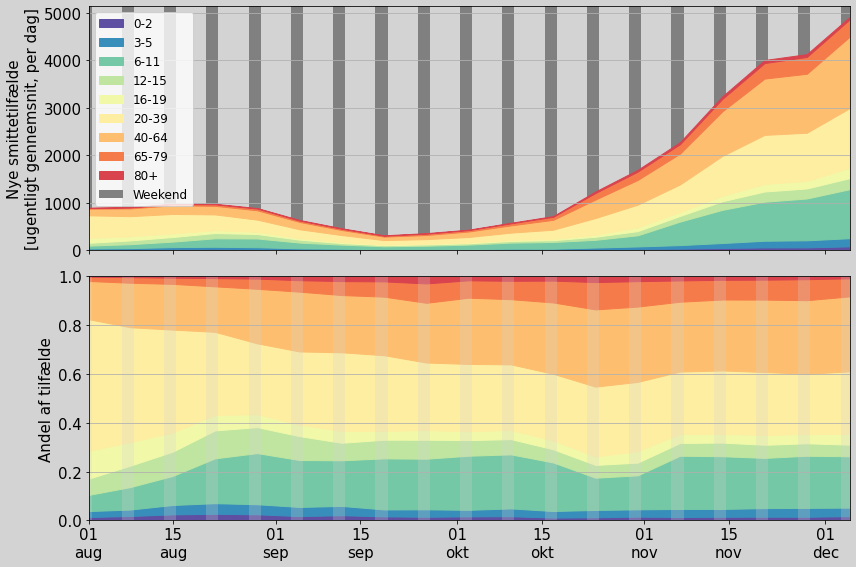

In [4]:


# fig,ax1 = plt.subplots()
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Antal positive'].values.shape)
# ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)

prevCount = curCount

allSums = curdf.groupby('Dato')['Antal positive'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)
    toAdd = thisdf['Antal positive'].values
    toAdd = thisdf['Antal positive'].values/7
    curCount = curCount + toAdd
    # ax1.plot(thisdf.Dato,curCount,label=curAge)
    ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,label=curAge)
    ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Nye smittetilfælde\n[ugentligt gennemsnit, per dag]')
ax2.set_ylabel('Andel af tilfælde')

# ax1.plot(thisdf.Dato,allSums,'k:')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=1)
ax1.legend(loc='upper left',fontsize=12)
# ax2.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_Cases')

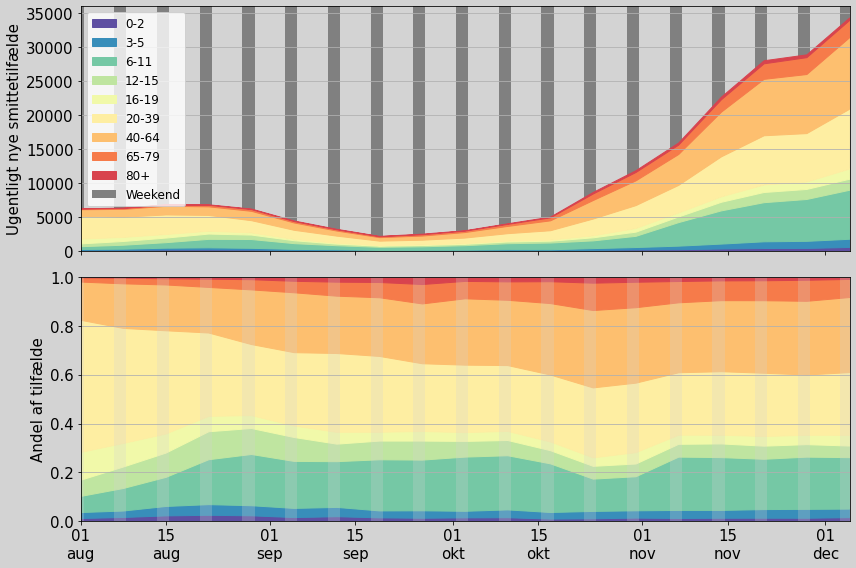

In [5]:


# fig,ax1 = plt.subplots()
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Antal positive'].values.shape)
# ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)

prevCount = curCount

allSums = curdf.groupby('Dato')['Antal positive'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)
    toAdd = thisdf['Antal positive'].values
    # toAdd = thisdf['Antal positive'].values/7
    curCount = curCount + toAdd
    # ax1.plot(thisdf.Dato,curCount,label=curAge)
    ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
    # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentligt nye smittetilfælde')
ax2.set_ylabel('Andel af tilfælde')

# ax1.plot(thisdf.Dato,allSums,'k:')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=1)
ax1.legend(loc='upper left',fontsize=12)
# ax2.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_CasesWeekly')

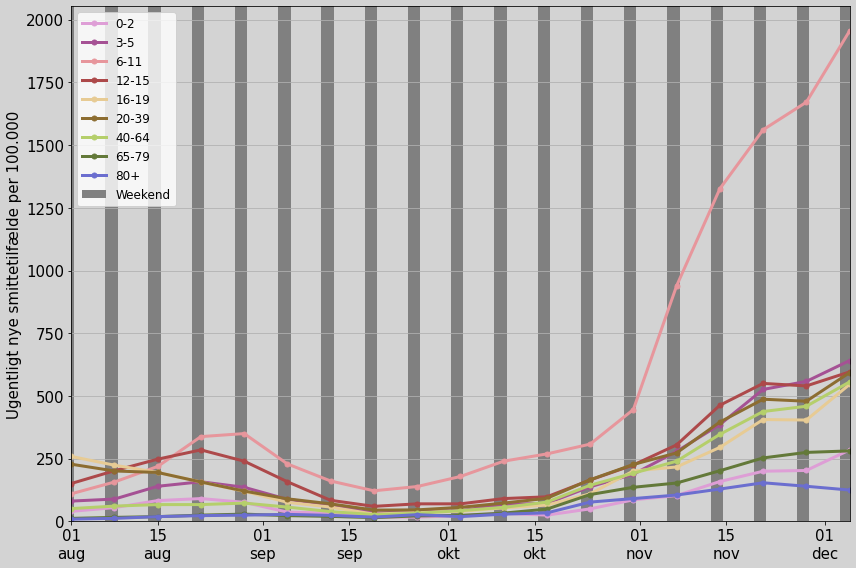

In [6]:


fig,ax1 = plt.subplots()
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Antal positive'].values.shape)
# ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)

prevCount = curCount

allSums = curdf.groupby('Dato')['Antal positive'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)
# cmap = plt.cm.get_cmap('inferno',len(allAgeGroups)+5)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)
    toAdd = thisdf['Positive pr. 100.000 borgere'].values
    # toAdd = thisdf['Antal positive'].values/7
    # curCount = curCount + toAdd
    ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
    # ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
    # # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentligt nye smittetilfælde per 100.000')
# ax2.set_ylabel('Andel af tilfælde')

# ax1.plot(thisdf.Dato,allSums,'k:')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
# ax2.set_ylim(bottom=0,top=1)
ax1.legend(loc='upper left',fontsize=12)
# ax2.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
# ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_CasesWeeklyPer100000')

# Testede

In [7]:
curdf.tail()

,Uge,Aldersgruppe,Testede pr. 100.000 borgere,Positive pr. 100.000 borgere,Nyindlagte pr. 100.000 borgere,Antal testede,Antal positive,Dato
845,2021-W48,16-19,17880,546.0,2.9,48993,1497.0,2021-12-05
846,2021-W48,20-39,22633,593.0,7.6,335291,8779.0,2021-12-05
847,2021-W48,40-64,27085,556.0,9.3,512039,10503.0,2021-12-05
848,2021-W48,65-79,11400,281.0,19.4,102949,2536.0,2021-12-05
849,2021-W48,80+,6766,125.0,34.6,19758,365.0,2021-12-05


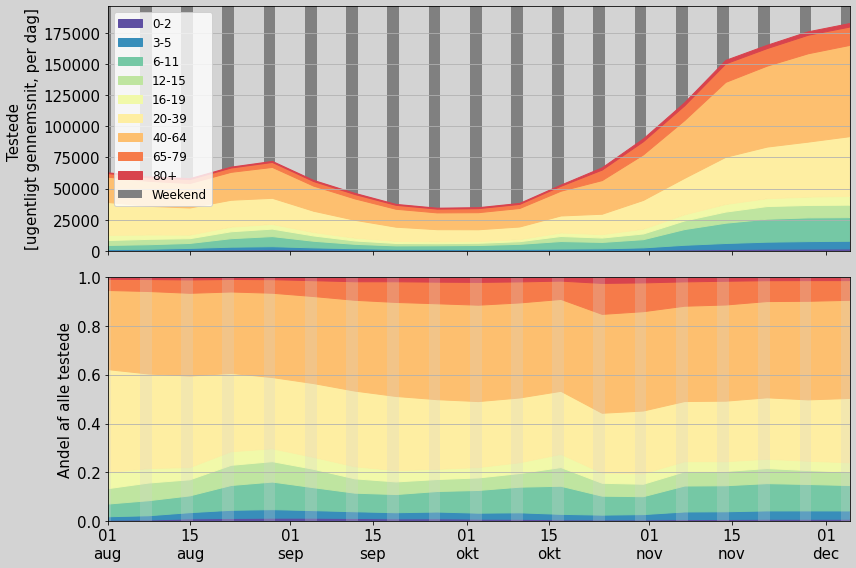

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Antal testede'].values.shape)
# ax1.plot(thisdf.Dato,thisdf['Antal testede'],label=curAge)

prevCount = curCount

allSums = curdf.groupby('Dato')['Antal testede'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    # ax1.plot(thisdf.Dato,thisdf['Antal testede'],label=curAge)
    toAdd = thisdf['Antal testede'].values
    toAdd = thisdf['Antal testede'].values/7
    curCount = curCount + toAdd
    # ax1.plot(thisdf.Dato,curCount,label=curAge)
    ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,label=curAge)
    ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Testede \n[ugentligt gennemsnit, per dag]')
ax2.set_ylabel('Andel af alle testede')


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=1)
ax1.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_Testede')

In [9]:
curdf.tail()

,Uge,Aldersgruppe,Testede pr. 100.000 borgere,Positive pr. 100.000 borgere,Nyindlagte pr. 100.000 borgere,Antal testede,Antal positive,Dato
845,2021-W48,16-19,17880,546.0,2.9,48993,1497.0,2021-12-05
846,2021-W48,20-39,22633,593.0,7.6,335291,8779.0,2021-12-05
847,2021-W48,40-64,27085,556.0,9.3,512039,10503.0,2021-12-05
848,2021-W48,65-79,11400,281.0,19.4,102949,2536.0,2021-12-05
849,2021-W48,80+,6766,125.0,34.6,19758,365.0,2021-12-05


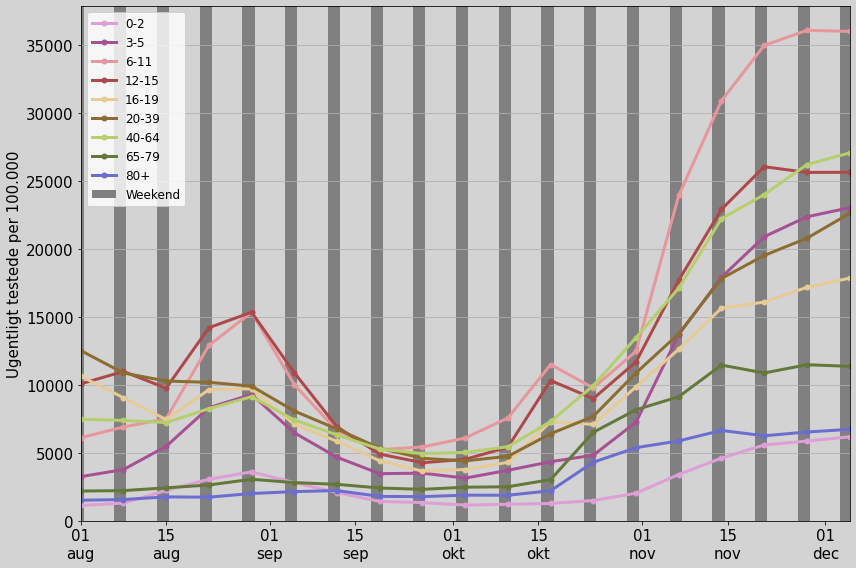

In [10]:


fig,ax1 = plt.subplots()
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Testede pr. 100.000 borgere'].values.shape)
# ax1.plot(thisdf.Dato,thisdf['Testede pr. 100.000 borgere'],label=curAge)

prevCount = curCount

allSums = curdf.groupby('Dato')['Testede pr. 100.000 borgere'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)
# cmap = plt.cm.get_cmap('inferno',len(allAgeGroups)+5)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    # ax1.plot(thisdf.Dato,thisdf['Antal Testede'],label=curAge)
    toAdd = thisdf['Testede pr. 100.000 borgere'].values
    # toAdd = thisdf['Antal Testede'].values/7
    # curCount = curCount + toAdd
    ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
    # ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
    # # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentligt testede per 100.000')
# ax2.set_ylabel('Andel af tilfælde')

# ax1.plot(thisdf.Dato,allSums,'k:')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
# ax1.set_ylim(top = 25000)
# ax2.set_ylim(bottom=0,top=1)
ax1.legend(loc='upper left',fontsize=12)
# ax2.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
# ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_TestedeWeeklyPer100000')

In [11]:
thisdf.columns

Index(['Uge', 'Aldersgruppe', 'Testede pr. 100.000 borgere',
       'Positive pr. 100.000 borgere', 'Nyindlagte pr. 100.000 borgere',
       'Antal testede', 'Antal positive', 'Dato'],
      dtype='object')

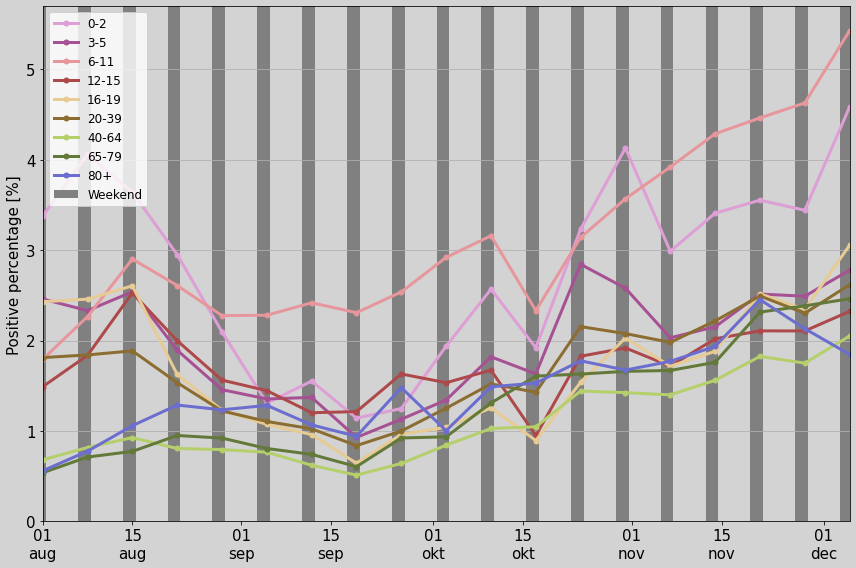

In [12]:


fig,ax1 = plt.subplots()
fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Antal testede'].values.shape)

prevCount = curCount

allSums = 100*curdf.groupby('Dato')['Antal positive'].sum().values/curdf.groupby('Dato')['Antal testede'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    
    toAdd = 100*thisdf['Antal positive'].values/thisdf['Antal testede'].values 
    
    ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')

ax1.set_ylabel('Positive percentage [%]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
# ax1.set_ylim(top = 25000)
ax1.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_PosPct')

# Indlagte

In [13]:
print(curdf.tail(9).sum())
display(curdf.tail(9))
print((6324+25698+ 88230)/831807)
print((189.0+522.0+ 3459.0)/15867.0)
# Testede pr. 100.000 borgere

Uge                               2021-W482021-W482021-W482021-W482021-W482021-W...
Aldersgruppe                                 0-23-56-1112-1516-1920-3940-6465-7980+
Testede pr. 100.000 borgere                                                  176713
Positive pr. 100.000 borgere                                                 5578.0
Nyindlagte pr. 100.000 borgere                                                 91.2
Antal testede                                                               1276132
Antal positive                                                              34226.0
dtype: object


<ipython-input-13-1c19389c6607>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(curdf.tail(9).sum())


,Uge,Aldersgruppe,Testede pr. 100.000 borgere,Positive pr. 100.000 borgere,Nyindlagte pr. 100.000 borgere,Antal testede,Antal positive,Dato
841,2021-W48,0-2,6218,285.0,10.4,11406,523.0,2021-12-05
842,2021-W48,3-5,23055,641.0,2.1,43152,1199.0,2021-12-05
843,2021-W48,6-11,36015,1955.0,2.7,132599,7199.0,2021-12-05
844,2021-W48,12-15,25661,596.0,2.2,69945,1625.0,2021-12-05
845,2021-W48,16-19,17880,546.0,2.9,48993,1497.0,2021-12-05
846,2021-W48,20-39,22633,593.0,7.6,335291,8779.0,2021-12-05
847,2021-W48,40-64,27085,556.0,9.3,512039,10503.0,2021-12-05
848,2021-W48,65-79,11400,281.0,19.4,102949,2536.0,2021-12-05
849,2021-W48,80+,6766,125.0,34.6,19758,365.0,2021-12-05


0.14456718926385567
0.26280960484023447


In [14]:
# curdf['Nyindlagte pr. 100.000 borgere']
# curdf

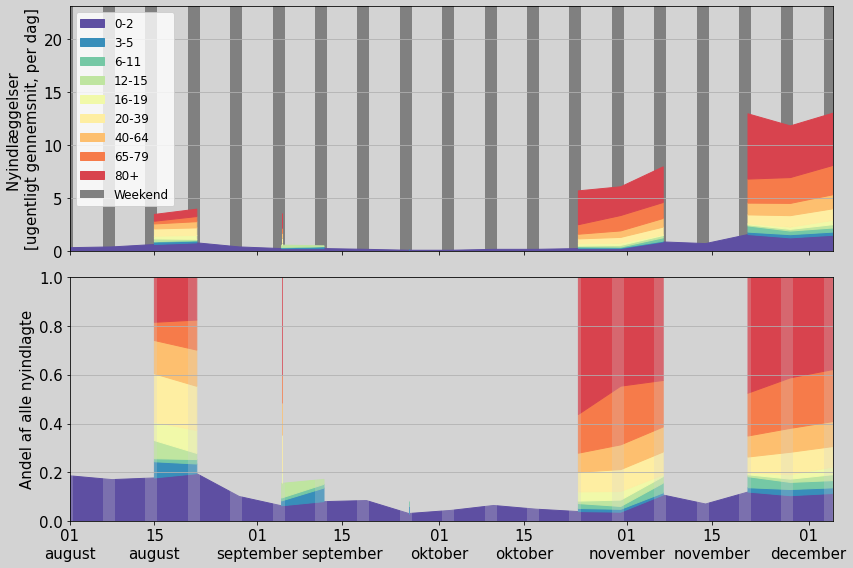

In [15]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Nyindlagte pr. 100.000 borgere'].values.shape)
# ax1.plot(thisdf.Dato,thisdf['Nyindlagte pr. 100.000 borgere'],label=curAge)

prevCount = curCount

allSums = curdf.groupby('Dato')['Nyindlagte pr. 100.000 borgere'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    # ax1.plot(thisdf.Dato,thisdf['Nyindlagte pr. 100.000 borgere'],label=curAge)
    toAdd = thisdf['Nyindlagte pr. 100.000 borgere'].values
    toAdd = thisdf['Nyindlagte pr. 100.000 borgere'].values/7
    curCount = curCount + toAdd
    # ax1.plot(thisdf.Dato,curCount,label=curAge)
    ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,label=curAge)
    ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Nyindlæggelser \n[ugentligt gennemsnit, per dag]')
ax2.set_ylabel('Andel af alle nyindlagte')


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=1)
ax1.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_NyindlagtePer100000')

In [16]:
curdf.columns

Index(['Uge', 'Aldersgruppe', 'Testede pr. 100.000 borgere',
       'Positive pr. 100.000 borgere', 'Nyindlagte pr. 100.000 borgere',
       'Antal testede', 'Antal positive', 'Dato'],
      dtype='object')

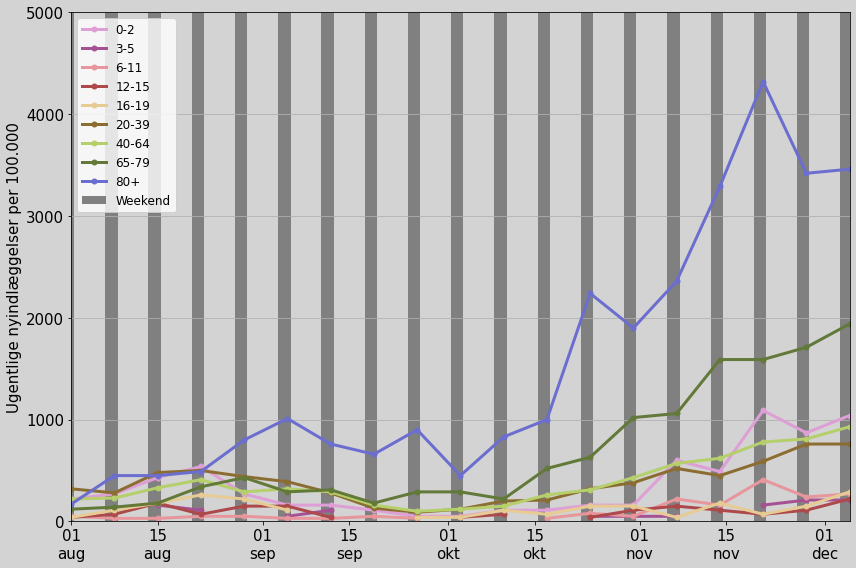

In [17]:


fig,ax1 = plt.subplots()
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

fig.patch.set_facecolor('lightgrey')
ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


curAge = '6-11'

thisdf = curdf[curdf.Aldersgruppe == curAge]
curCount = np.zeros(thisdf['Nyindlagte pr. 100.000 borgere'].values.shape)

prevCount = curCount

allSums = 100*curdf.groupby('Dato')['Nyindlagte pr. 100.000 borgere'].sum().values

allAgeGroups = curdf.Aldersgruppe.unique()

cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)
# cmap = plt.cm.get_cmap('inferno',len(allAgeGroups)+5)

counter=0
for curAge in allAgeGroups:
    thisdf = curdf[curdf.Aldersgruppe == curAge]
    toAdd = 100*thisdf['Nyindlagte pr. 100.000 borgere'].values
    # toAdd = thisdf['Antal Testede'].values/7
    # curCount = curCount + toAdd
    ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
    # ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
    # # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
    # prevCount = curCount
    counter = counter+1
    
    
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
    # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentlige nyindlæggelser per 100.000')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax1.set_ylim(top = 5000)
ax1.legend(loc='upper left',fontsize=12)
# ax2.legend(loc='upper left',fontsize=12)
ax1.grid(axis='y')
# ax2.grid(axis='y')
fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_AdmissionsWeeklyPer100000')